In [1]:
path=r'C:/Users/lenovo/Desktop/ML Project/Group Project_LastSem/dataset/'

In [2]:
import pandas as pd
import numpy as np

In [6]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
labels = pd.read_csv(path+"test_labels.csv")

In [7]:
train.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [8]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

In [109]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]
list_sentences_train[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [2]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd                                                  
import re
import seaborn as sns

#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
#model = hub.load(module_url)
model = hub.KerasLayer('universal-sentence-encoder_4')    # load USE_4 model
#print ("module %s loaded" % module_url)
def embed(input):    # function for embedding
    return model(input)

D:\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)

Bad key "text.kerning_factor" on line 4 in
D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


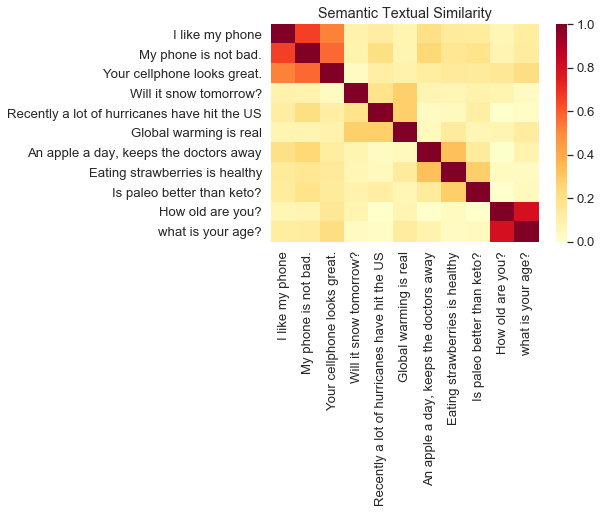

In [3]:
# test similarity
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)
    
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not bad.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

In [107]:
# transfrom sentences to embeddings: (test set)
embeddings_test = []
count = 0
for i in list_sentences_test:
    embedding = embed([i])
    embedding = np.reshape(np.array(embedding), (512,))
    embeddings_test.append(embedding)
    count += 1
    if count % 1000 == 0:
        print(count)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000


In [108]:
# save embeddings into a file:
df_test = pd.DataFrame(embeddings_test)
df_test.to_csv("use_embeddings_test.csv", index = False)

In [82]:
# transfrom sentences to embeddings: (training set)
embeddings_train = []
count = 0
for i in list_sentences_train:
    embedding = embed([i])
    embedding = np.reshape(np.array(embedding), (512,))
    embeddings_train.append(embedding)
    count += 1
    if count % 1000 == 0:
        print(count)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [85]:
# save embeddings into a file:
df = pd.DataFrame(embeddings_train)
df.to_csv("use_embeddings.csv", index = False)

In [10]:
df

0         1         2         3         4         5         6  \
0      -0.057829 -0.034936  0.027102 -0.030281 -0.036649 -0.028683 -0.028100   
1      -0.072239 -0.000845 -0.072422  0.077013  0.004003 -0.051323 -0.031766   
2       0.003207 -0.051132  0.010560 -0.016915  0.013706  0.037521  0.029077   
3      -0.037711 -0.079591  0.034021 -0.028984 -0.027576 -0.055188  0.073068   
4      -0.005501 -0.013888 -0.007009 -0.007767 -0.076502  0.020703 -0.013790   
...          ...       ...       ...       ...       ...       ...       ...   
159566  0.001070 -0.055367 -0.034541  0.024528  0.065058 -0.057712  0.037719   
159567 -0.042286  0.041825 -0.017267 -0.023695 -0.005338  0.058423 -0.079614   
159568  0.034068 -0.037034 -0.031748 -0.028014  0.030389 -0.017949  0.073730   
159569 -0.044925 -0.000159 -0.020958 -0.017049 -0.048746  0.050928 -0.018042   
159570 -0.012506  0.001415  0.022212 -0.031086 -0.051902  0.024268  0.006591   

               7         8         9  ...       502       503       504  \
0       0.009702 -0.062288 -0.075045  ...  0.047403 -0.015946  0.066618   
1       0.034427  0.022856  0.031030  ...  0.015493 -0.032769  0.064275   
2       0.022742  0.075265  0.024829  ...  0.053218 -0.029817 -0.001971   
3       0.067444 -0.018094 -0.009031  ... -0.044643 -0.089882  0.082151   
4       0.035132  0.054153 -0.011901  ...  0.028492  0.055228 -0.003574   
...          ...       ...       ...  ...       ...       ...       ...   
159566 -0.015136  0.028250  0.006690  ...  0.012075 -0.074521 -0.058908   
159567  0.025481  0.000808  0.053419  ... -0.011581  0.057738  0.079018   
159568  0.013601  0.059243 -0.082300  ...  0.075473  0.055813 -0.004202   
159569  0.093370  0.090315 -0.002193  ...  0.028292 -0.016297  0.020593   
159570 -0.007948 -0.084692  0.021051  ...  0.019593 -0.022690  0.005489   

             505       506       507       508       509       510       511  
0      -0.015660  0.026602  0.020195  0.026565  0.042301 -0.006533 -0.019236  
1       0.029421  0.027461 -0.051449  0.026288  0.079270 -0.017300 -0.036883  
2       0.024621 -0.035393 -0.019538  0.026084  0.021588  0.005711  0.051066  
3      -0.065413 -0.014664 -0.015276  0.048384  0.086423  0.011943 -0.040211  
4      -0.058755  0.074529 -0.018632  0.033386  0.001527  0.083882  0.020426  
...          ...       ...       ...       ...       ...       ...       ...  
159566 -0.025938  0.013500  0.040252  0.050592  0.030546 -0.049594  0.017325  
159567 -0.065949  0.028104 -0.084772 -0.001553 -0.049476 -0.019113  0.026570  
159568 -0.082320  0.048782  0.025602 -0.046695  0.000207 -0.008235  0.050622  
159569 -0.021378 -0.067984 -0.027808 -0.019454  0.026577  0.019102 -0.028288  
159570 -0.020745  0.038252 -0.021589 -0.069540 -0.008625  0.035466  0.012538  

[159571 rows x 512 columns]